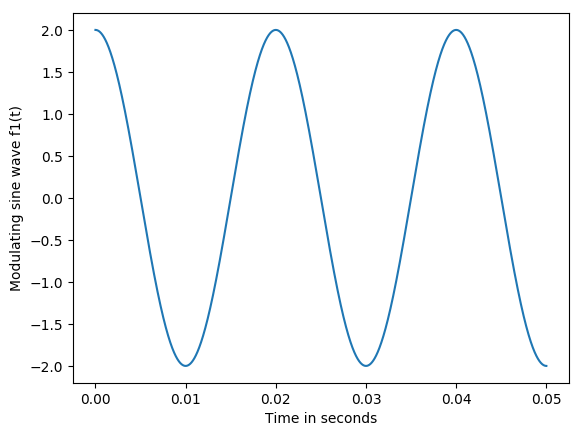

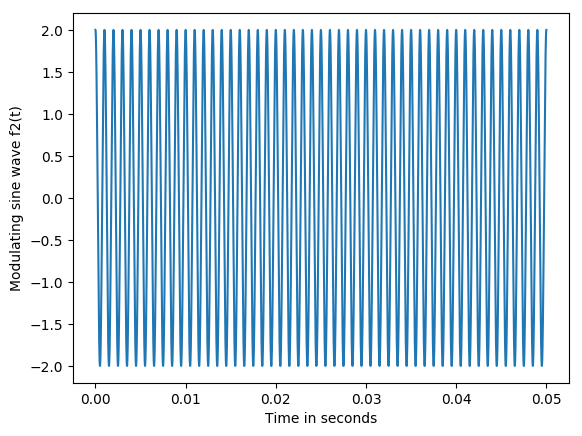

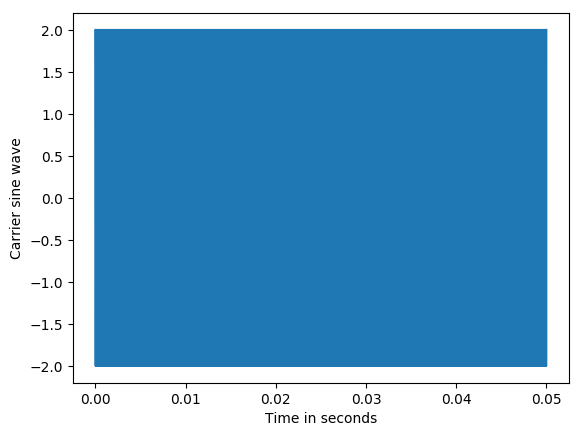

-499990.00019999605:19.99960000799984:499990.00019999605

In [1]:
using PyPlot

Δt = 0.000001 #time step
t = 0:Δt:0.05;#Define time from 0 CHANGE TO 0.1 to see 1kHz

Δω = 2*pi/0.5  # Sample spacing in freq domain in rad/s
N = length(t);
ω = 0:Δω:(N-1)*Δω



#First Modulating Sine Wave
f01=50;
ω01 = 2*pi*f01;   # rad/s
fm = 2*cos.(ω01*t);   # Create an array holding the sinusoid values

figure()
plot(t,fm,"-")

xlabel("Time in seconds");
ylabel("Modulating sine wave f1(t)");

#Second Modulating Sine Wave
f0 = 1000
ω0 = 2*pi*f0;   #rad/s

fm1 = 2*cos.(ω0*t);

figure()
plot(t,fm1,"-")

xlabel("Time in seconds");
ylabel("Modulating sine wave f2(t)");

#Carrier Sine wave
f0c = 20000
ωc = 2*pi*f0c;   # rad/s

fc = 2*cos.(ωc*t);  

figure()
plot(t,fc,"-")

xlabel("Time in seconds");
ylabel("Carrier sine wave");
#Shifted Carrier
fc_s = 2*sin.(ωc*t);

#Label the frequency axis in Hz
N = length(t);
Δf = 1/(N*Δt) #spacing in frequency domain

#create array of freq values stored in f_axis. First element maps to 0Hz
if mod(N,2)==0 #case N even
    f_axis = (-N/2:N/2-1)*Δf;    
else   # case N odd
    f_axis = (-(N-1)/2 : (N-1)/2)*Δf; 
end

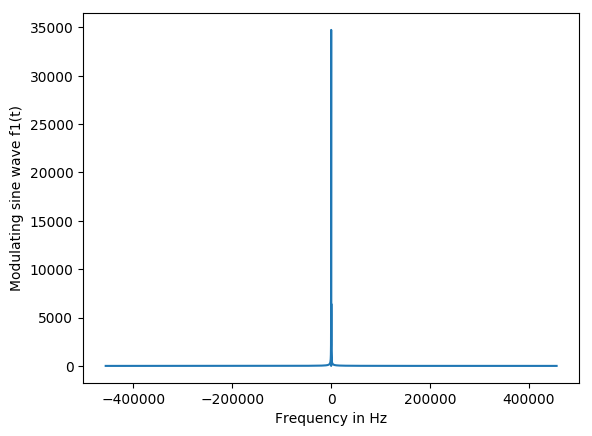

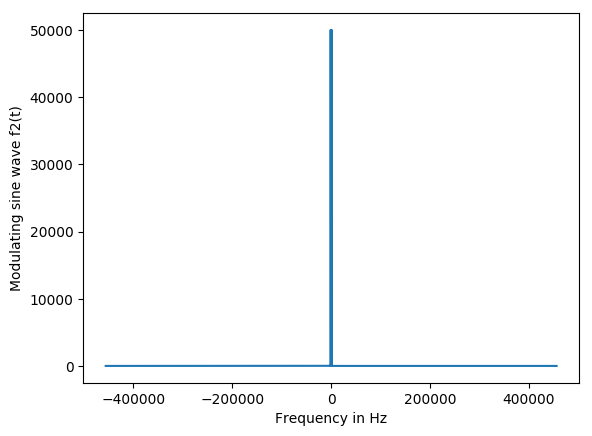

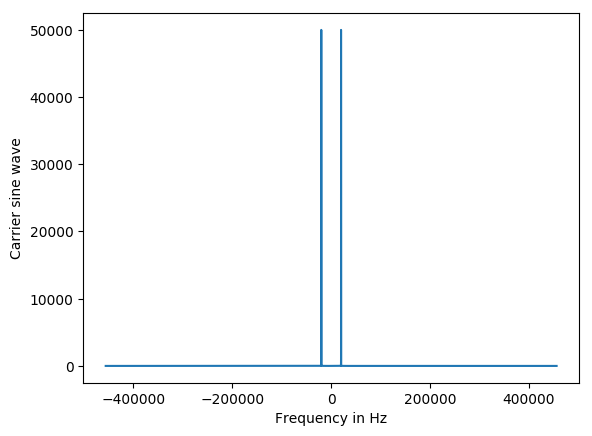

In [2]:
using FFTW

figure()
plot(f_axis[2200:end-2200],fftshift(abs.(fft(fm)))[2200:end-2200],"-")
xlabel("Frequency in Hz");
ylabel("Modulating sine wave f1(t)");

figure()
plot(f_axis[2200:end-2200],fftshift(abs.(fft(fm1)))[2200:end-2200],"-")
xlabel("Frequency in Hz");
ylabel("Modulating sine wave f2(t)");

figure()
plot(f_axis[2200:end-2200],fftshift(abs.(fft(fc)))[2200:end-2200],"-")
xlabel("Frequency in Hz");
ylabel("Carrier sine wave");

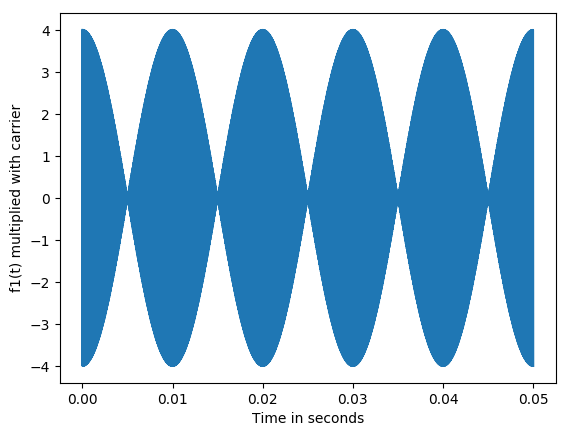

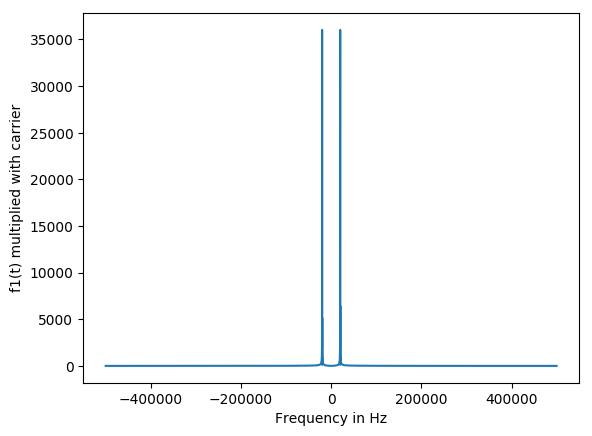

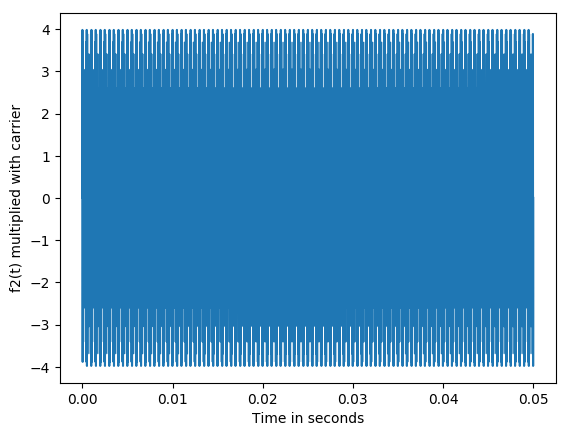

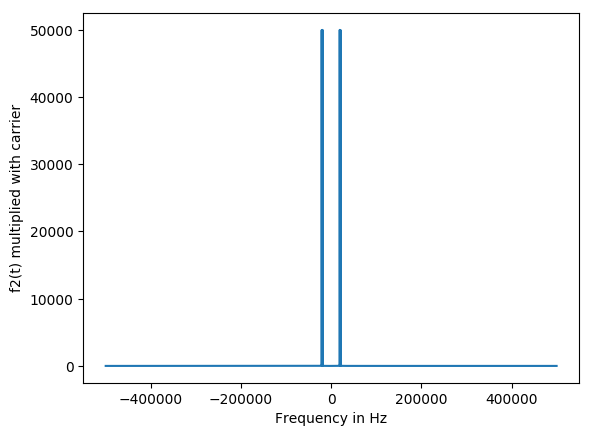

In [3]:
#First Modulated Wave

ϕ1 = fm.*fc

#Second Modulated Wave

ϕ2 = fm1.*fc_s
using FFTW

figure()
plot(t,ϕ1,"-")
xlabel("Time in seconds");
ylabel("f1(t) multiplied with carrier");

figure()
plot(f_axis,fftshift(abs.(fft(ϕ1))),"-")
xlabel("Frequency in Hz");
ylabel("f1(t) multiplied with carrier");

figure()
plot(t,ϕ2,"-")
xlabel("Time in seconds");
ylabel("f2(t) multiplied with carrier");

figure()
plot(f_axis,fftshift(abs.(fft(ϕ2))),"-")
xlabel("Frequency in Hz");
ylabel("f2(t) multiplied with carrier");

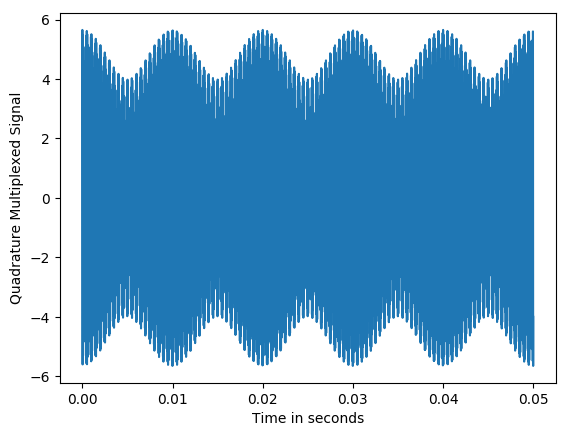

In [4]:
ϕ = ϕ1.+ϕ2

figure()
plot(t,ϕ,"-")
xlabel("Time in seconds");
ylabel("Quadrature Multiplexed Signal");

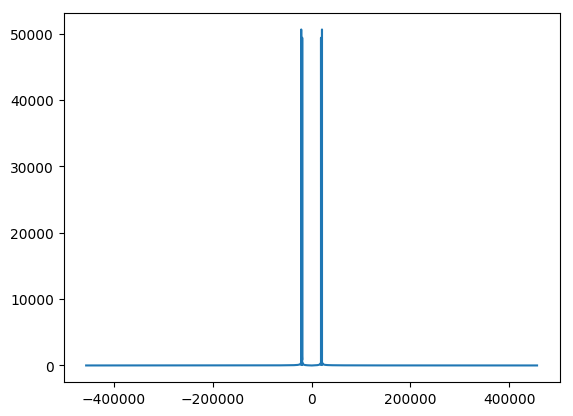

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f959baa1050>

In [6]:
ϕ.*fc

using FFTW
Φ = fft(ϕ)

figure()
plot(f_axis[2200:end-2200],fftshift(abs.(Φ))[2200:end-2200],"-")

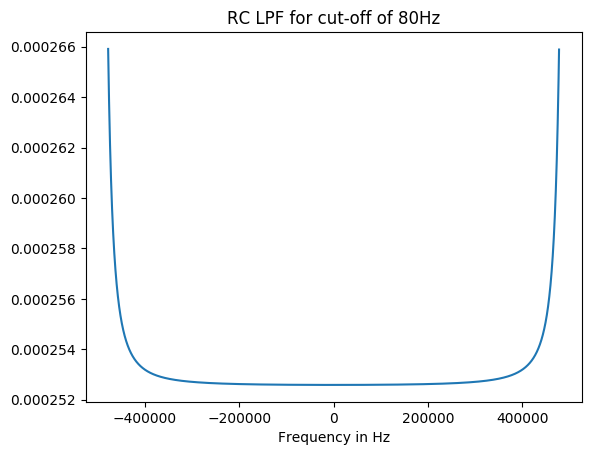

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PyObject Text(0.5,24,'Frequency in Hz')

In [13]:
#LPF of 50Hz 
R = 900
C = 2.2e-6

lpf1 = 1/(R*C).*exp.(-t/(R*C))*Δt; 

LPF1 = fft(lpf1);

figure()
plot(f_axis[2200:end-2200],LPF1[2200:end-2200]);
title("RC LPF for cut-off of 80Hz")
xlabel("Frequency in Hz")

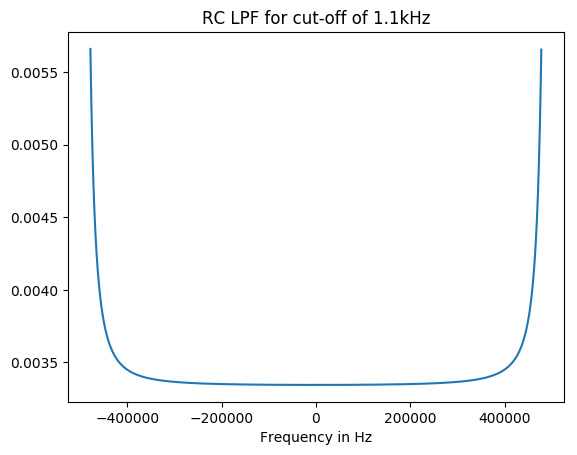

PyObject Text(0.5,24,'Frequency in Hz')

In [14]:
#LPF of 1kHz 
R = 1e3
C = 150e-9

lpf2 = 1/(R*C).*exp.(-t/(R*C))*Δt; 

LPF2 = fft(lpf2);

figure()
plot(f_axis[2200:end-2200],LPF2[2200:end-2200]);
title("RC LPF for cut-off of 1.1kHz")
xlabel("Frequency in Hz")

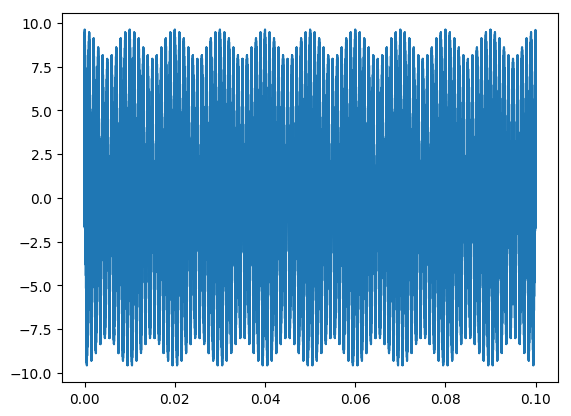

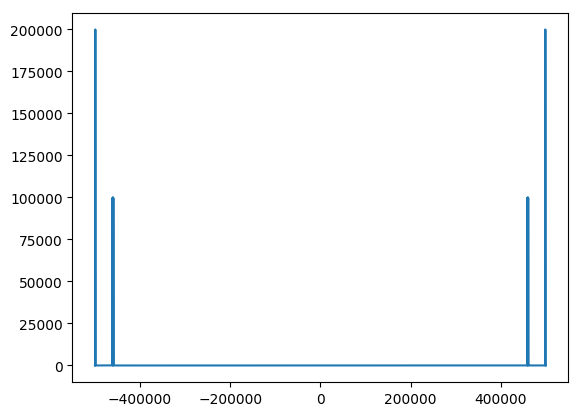

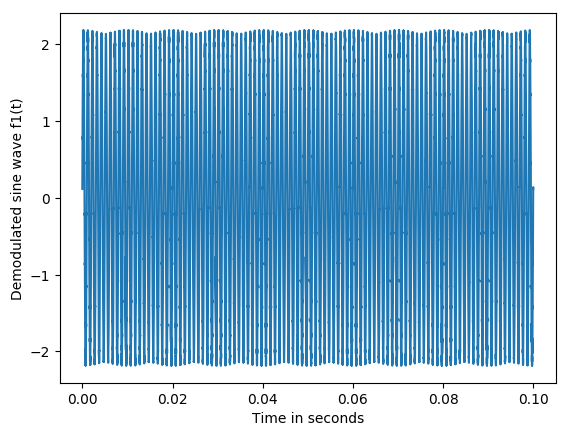

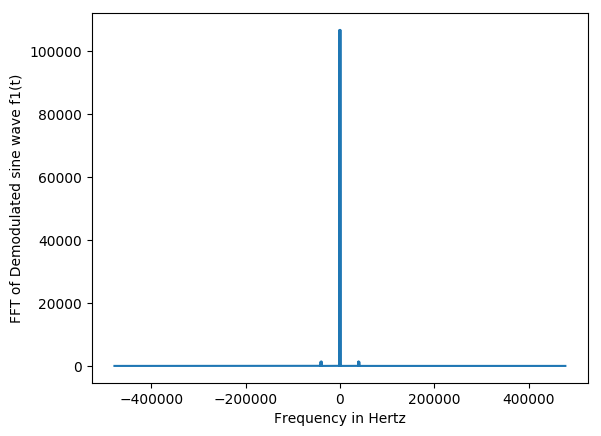

In [15]:
#Channel 1

dm = ϕ.*fc_s

figure()
plot(t,dm,"-")

DM = fft(dm)

figure()
plot(f_axis,abs.(DM))

RECOV = DM.*LPF1*6.66666666666666

recov = ifft(RECOV)

figure()
plot(t,recov)
xlabel("Time in seconds");
ylabel("Demodulated sine wave f1(t)");

figure()
plot(f_axis[2200:end-2200],fftshift(abs.(RECOV))[2200:end-2200],"-")
xlabel("Frequency in Hertz");
ylabel("FFT of Demodulated sine wave f1(t)");

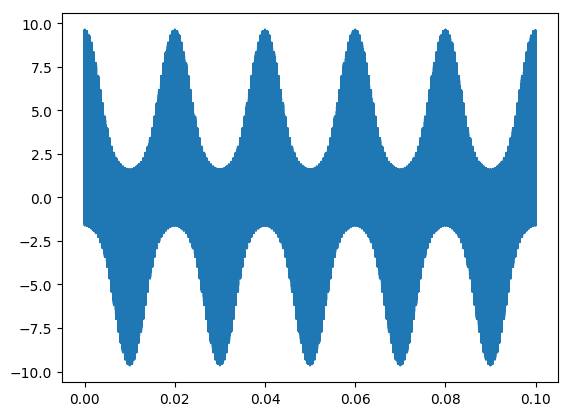

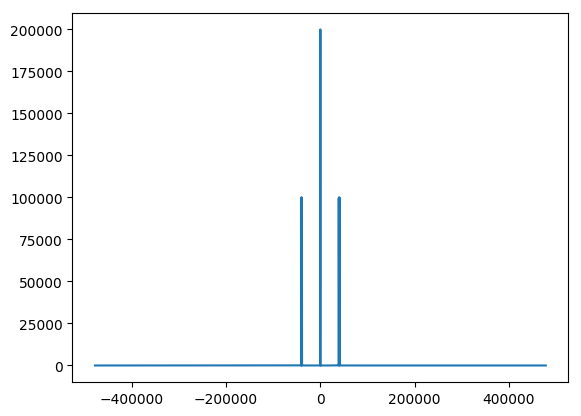

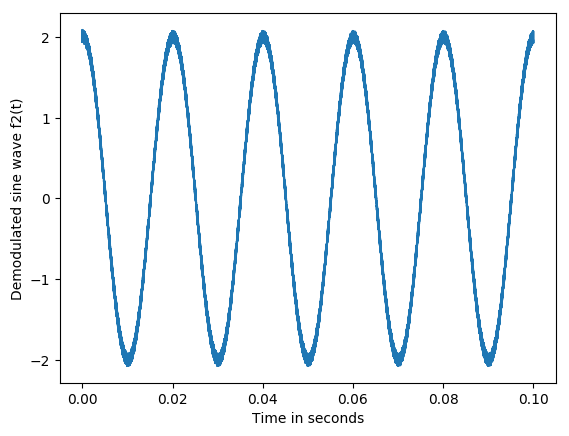

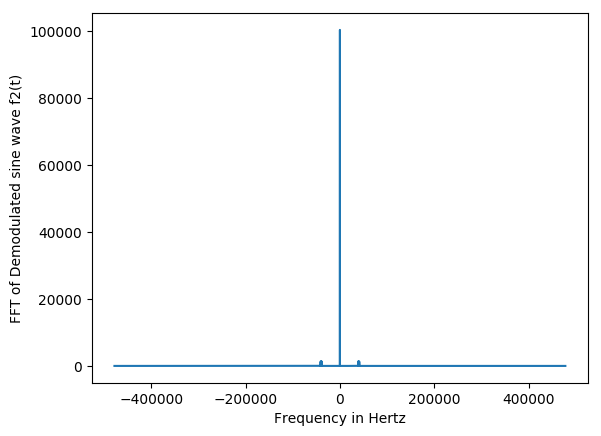

In [16]:
#Channel 2

dm2 = ϕ.*fc

figure()
plot(t,dm2,"-")

DM2 = fft(dm2)

figure()
plot(f_axis[2200:end-2200],fftshift(abs.(DM2))[2200:end-2200],"-")

RECOV2 = (DM2.*LPF2)/2

recov2 = ifft(RECOV2)

figure()
plot(t,recov2,"-")
xlabel("Time in seconds");
ylabel("Demodulated sine wave f2(t)");

figure()
plot(f_axis[2200:end-2200],fftshift(abs.(RECOV2))[2200:end-2200],"-")
xlabel("Frequency in Hertz");
ylabel("FFT of Demodulated sine wave f2(t)");
